# Data Information

Carat -> Carat weight of the cubic zirconia.

Cut -> Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal.

Color -> Colour of the cubic zirconia.With D being the best and J the worst.

Clarity	-> cubic zirconia Clarity refers to the absence of the Inclusions and Blemishes. (In order from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3

Depth ->	 The Height of a cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.

Table ->	 The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.

Price ->	 the Price of the cubic zirconia.

X ->	 Length of the cubic zirconia in mm.

Y	-> Width of the cubic zirconia in mm.

Z ->	 Height of the cubic zirconia in mm.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [92]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/Gemstone-Price/cubic_zirconia.csv')

In [93]:
df.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
5,6,1.02,Ideal,D,VS2,61.5,56.0,6.46,6.49,3.99,9502
6,7,1.01,Good,H,SI1,63.7,60.0,6.35,6.30,4.03,4836
7,8,0.50,Premium,E,SI1,61.5,62.0,5.09,5.06,3.12,1415
8,9,1.21,Good,H,SI1,63.8,64.0,6.72,6.63,4.26,5407
9,10,0.35,Ideal,F,VS2,60.5,57.0,4.52,4.60,2.76,706


In [94]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [95]:
df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...
26962,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


In [96]:
df.shape

(26967, 10)

In [97]:
df.describe()

,carat,depth,table,x,y,z,price
count,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [98]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]

In [99]:
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 7
Discrete feature Count 0
Continuous feature Count 7
Categorical feature Count 3


In [100]:
categorical_feature

['cut', 'color', 'clarity']

In [101]:
df['cut'].value_counts()

Ideal        10816
Premium       6899
Very Good     6030
Good          2441
Fair           781
Name: cut, dtype: int64

In [102]:
df['color'].value_counts()

G    5661
E    4917
F    4729
H    4102
D    3344
I    2771
J    1443
Name: color, dtype: int64

In [104]:
df['clarity'].value_counts()

SI1     6571
VS2     6099
SI2     4575
VS1     4093
VVS2    2531
VVS1    1839
IF       894
I1       365
Name: clarity, dtype: int64

In [107]:
df = df.replace({'Ideal':4,'Premium':3,'Very Good':2,'Good':1,'Fair':0})
df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,4,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,3,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,2,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,4,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,4,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...
26962,1.11,3,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,4,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,3,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,2,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


In [108]:
df['cut'].value_counts()

4    10816
3     6899
2     6030
1     2441
0      781
Name: cut, dtype: int64

Text(0.5, 0, 'cut')

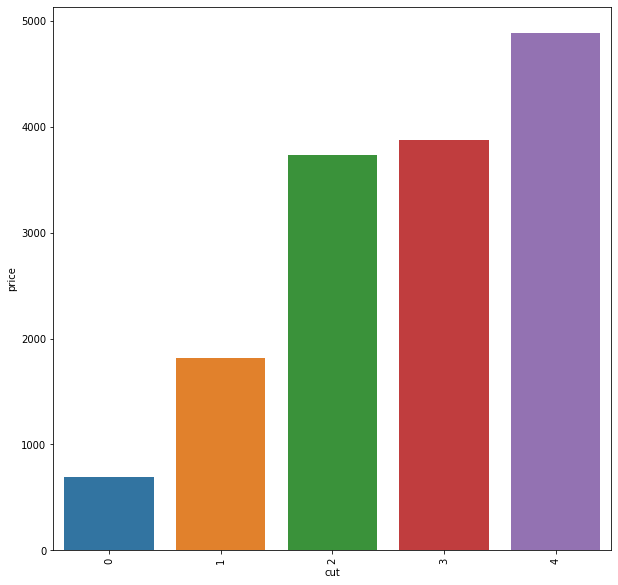

In [156]:
fig, ax = plt.subplots(figsize=(10,10))
data = df.groupby('cut')[['price']].nunique()
data = data.reset_index()
sns.barplot(x = data.cut,y=data.price,ax=ax)
plt.xticks(rotation=90)
plt.xlabel('cut')

In [109]:
e = LabelEncoder()
def encode(df,variable):
  df[variable] = e.fit_transform(df[variable])

In [110]:
encode(df,'color')
encode(df,'clarity')

Text(0.5, 0, 'color')

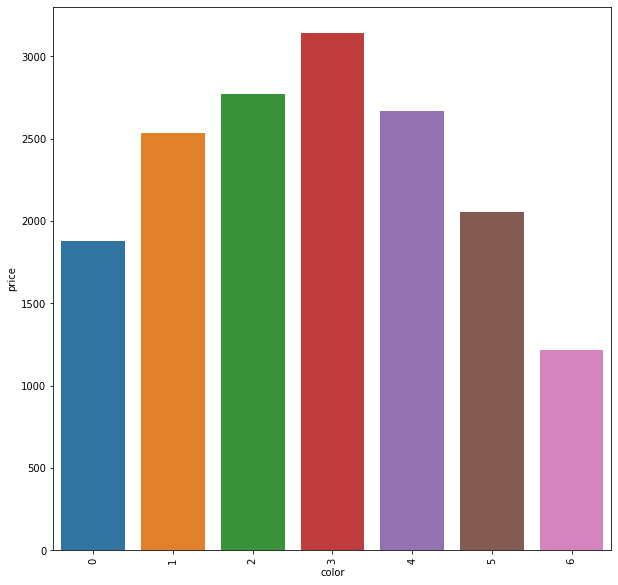

In [157]:
fig, ax = plt.subplots(figsize=(10,10))
data = df.groupby('color')[['price']].nunique()
data = data.reset_index()
sns.barplot(x = data.color,y=data.price,ax=ax)
plt.xticks(rotation=90)
plt.xlabel('color')

Text(0.5, 0, 'clarity')

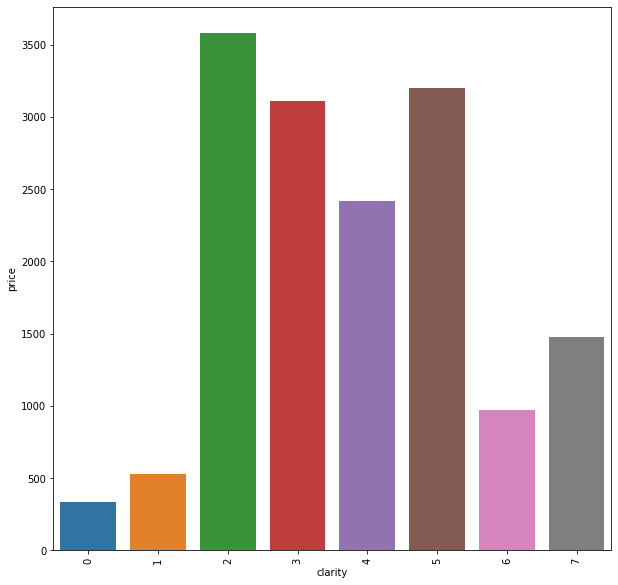

In [158]:
fig, ax = plt.subplots(figsize=(10,10))
data = df.groupby('clarity')[['price']].nunique()
data = data.reset_index()
sns.barplot(x = data.clarity,y=data.price,ax=ax)
plt.xticks(rotation=90)
plt.xlabel('clarity')

In [111]:
df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,4,1,2,62.1,58.0,4.27,4.29,2.66,499
1,0.33,3,3,1,60.8,58.0,4.42,4.46,2.70,984
2,0.90,2,1,7,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,4,2,4,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,4,2,6,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...
26962,1.11,3,3,2,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,4,4,1,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,3,1,5,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,2,2,7,61.8,56.0,4.19,4.20,2.60,682


In [112]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [113]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)

In [114]:
impute_nan(df,'depth',df.depth.median())

In [115]:
df

,carat,cut,color,clarity,depth,table,x,y,z,price,depth_median
0,0.30,4,1,2,62.1,58.0,4.27,4.29,2.66,499,62.1
1,0.33,3,3,1,60.8,58.0,4.42,4.46,2.70,984,60.8
2,0.90,2,1,7,62.2,60.0,6.04,6.12,3.78,6289,62.2
3,0.42,4,2,4,61.6,56.0,4.82,4.80,2.96,1082,61.6
4,0.31,4,2,6,60.4,59.0,4.35,4.43,2.65,779,60.4
...,...,...,...,...,...,...,...,...,...,...,...
26962,1.11,3,3,2,62.3,58.0,6.61,6.52,4.09,5408,62.3
26963,0.33,4,4,1,61.9,55.0,4.44,4.42,2.74,1114,61.9
26964,0.51,3,1,5,61.7,58.0,5.12,5.15,3.17,1656,61.7
26965,0.27,2,2,7,61.8,56.0,4.19,4.20,2.60,682,61.8


In [116]:
df.drop('depth',axis=1,inplace=True)
df

,carat,cut,color,clarity,table,x,y,z,price,depth_median
0,0.30,4,1,2,58.0,4.27,4.29,2.66,499,62.1
1,0.33,3,3,1,58.0,4.42,4.46,2.70,984,60.8
2,0.90,2,1,7,60.0,6.04,6.12,3.78,6289,62.2
3,0.42,4,2,4,56.0,4.82,4.80,2.96,1082,61.6
4,0.31,4,2,6,59.0,4.35,4.43,2.65,779,60.4
...,...,...,...,...,...,...,...,...,...,...
26962,1.11,3,3,2,58.0,6.61,6.52,4.09,5408,62.3
26963,0.33,4,4,1,55.0,4.44,4.42,2.74,1114,61.9
26964,0.51,3,1,5,58.0,5.12,5.15,3.17,1656,61.7
26965,0.27,2,2,7,56.0,4.19,4.20,2.60,682,61.8


In [117]:
df.isnull().sum()

carat           0
cut             0
color           0
clarity         0
table           0
x               0
y               0
z               0
price           0
depth_median    0
dtype: int64

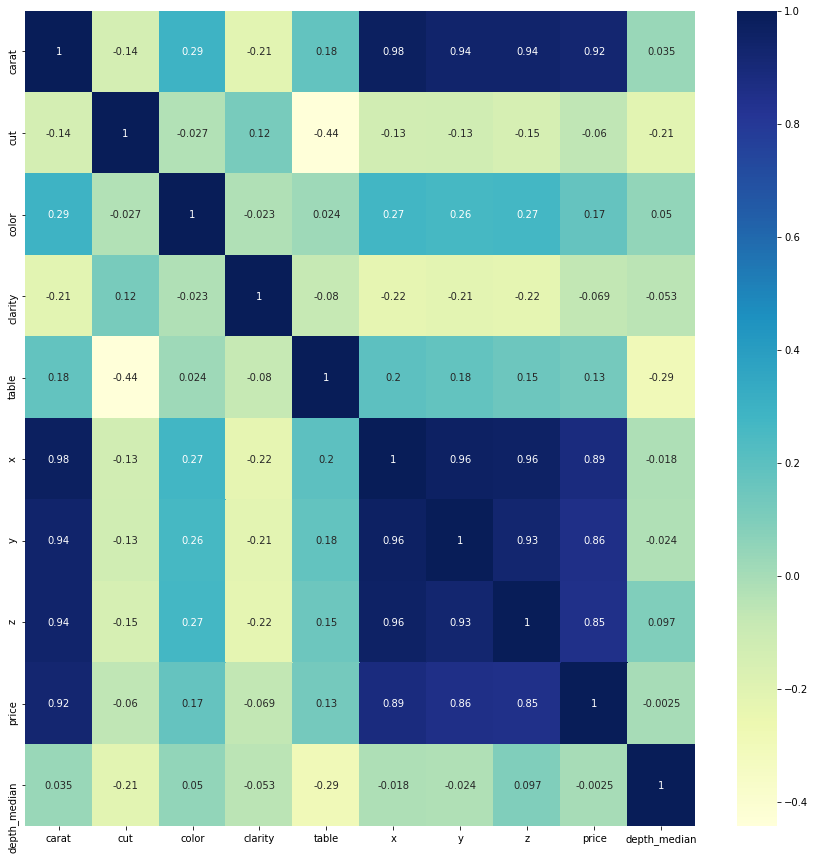

In [118]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True,ax=ax)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


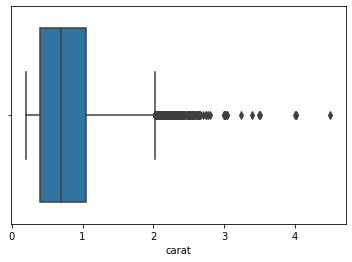

In [119]:
sns.boxplot(df.carat)

In [120]:
IQR=df.carat.quantile(0.75)-df.carat.quantile(0.25)
lower_bridge=df.carat.quantile(0.25)-(IQR*1.5)
upper_bridge=df.carat.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-0.5750000000000001 2.0250000000000004


In [121]:
df.loc[df['carat']>=2.025,'carat']=2.025
df.loc[df['carat']<=-0.57,'carat']=-0.57

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


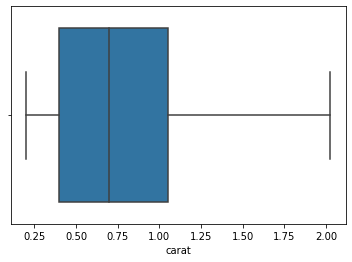

In [122]:
sns.boxplot(df.carat)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


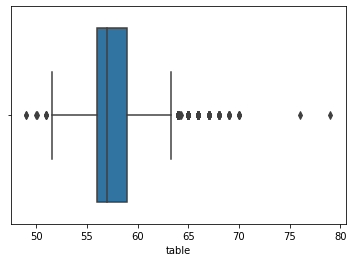

In [123]:
sns.boxplot(df.table)

In [124]:
IQR=df.table.quantile(0.75)-df.table.quantile(0.25)
lower_bridge=df.table.quantile(0.25)-(IQR*1.5)
upper_bridge=df.table.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

51.5 63.5


In [125]:
df.loc[df['table']>=63.5,'table']=63.5
df.loc[df['table']<=51.5,'table']=51.5

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


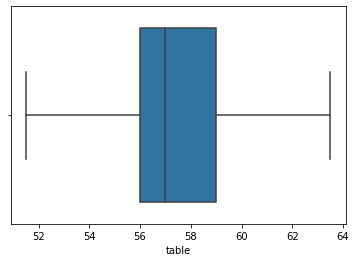

In [126]:
sns.boxplot(df.table)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


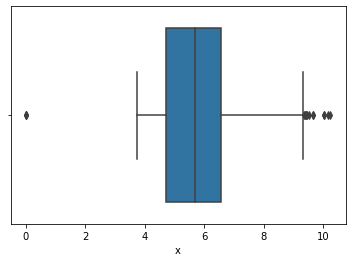

In [127]:
sns.boxplot(df.x)

In [128]:
IQR=df.x.quantile(0.75)-df.x.quantile(0.25)
lower_bridge=df.x.quantile(0.25)-(IQR*1.5)
upper_bridge=df.x.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

1.9500000000000002 9.309999999999999


In [129]:
df.loc[df['x']>=9.30,'x']=9.30
df.loc[df['x']<=1.95,'x']=1.95

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


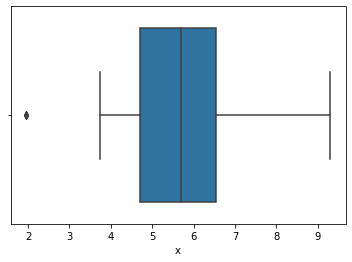

In [130]:
sns.boxplot(df.x)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


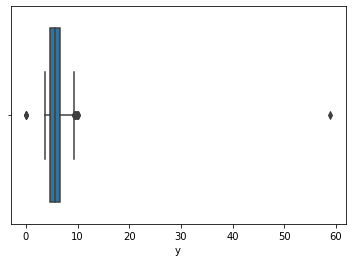

In [131]:
sns.boxplot(df.y)

In [132]:
IQR=df.y.quantile(0.75)-df.y.quantile(0.25)
lower_bridge=df.y.quantile(0.25)-(IQR*1.5)
upper_bridge=df.y.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

1.9649999999999999 9.285


In [133]:
df.loc[df['y']>=9.285,'y']=9.285
df.loc[df['y']<=1.964,'y']=1.964

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


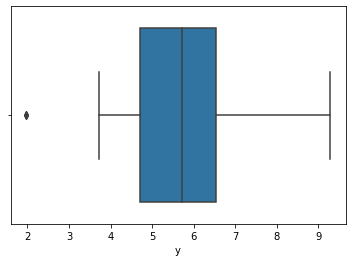

In [134]:
sns.boxplot(df.y)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


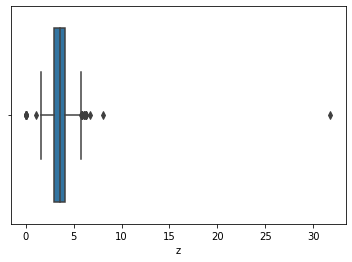

In [135]:
sns.boxplot(df.z)

In [136]:
IQR=df.z.quantile(0.75)-df.z.quantile(0.25)
lower_bridge=df.z.quantile(0.25)-(IQR*1.5)
upper_bridge=df.z.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

1.1899999999999997 5.75


In [137]:
df.loc[df['z']>=5.75,'z']=5.75
df.loc[df['z']<=1.18,'z']=1.18

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


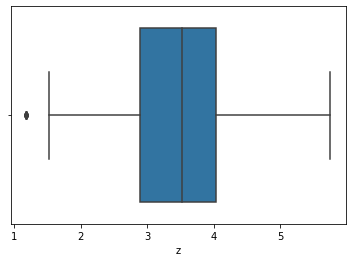

In [139]:
sns.boxplot(df.z)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


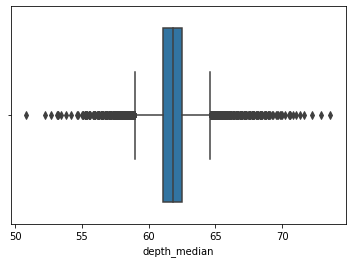

In [138]:
sns.boxplot(df.depth_median)

In [140]:
IQR=df.depth_median.quantile(0.75)-df.depth_median.quantile(0.25)
lower_bridge=df.depth_median.quantile(0.25)-(IQR*1.5)
upper_bridge=df.depth_median.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

59.0 64.6


In [141]:
df.loc[df['depth_median']>=64.6,'depth_median']=64.6
df.loc[df['depth_median']<=59.0,'depth_median']=59.0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


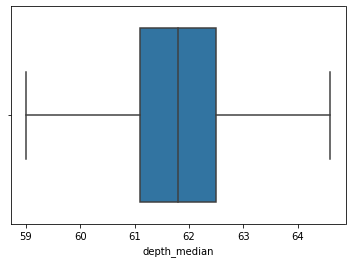

In [142]:
sns.boxplot(df.depth_median)

In [145]:
df

,carat,cut,color,clarity,table,x,y,z,price,depth_median
0,0.30,4,1,2,58.0,4.27,4.29,2.66,499,62.1
1,0.33,3,3,1,58.0,4.42,4.46,2.70,984,60.8
2,0.90,2,1,7,60.0,6.04,6.12,3.78,6289,62.2
3,0.42,4,2,4,56.0,4.82,4.80,2.96,1082,61.6
4,0.31,4,2,6,59.0,4.35,4.43,2.65,779,60.4
...,...,...,...,...,...,...,...,...,...,...
26962,1.11,3,3,2,58.0,6.61,6.52,4.09,5408,62.3
26963,0.33,4,4,1,55.0,4.44,4.42,2.74,1114,61.9
26964,0.51,3,1,5,58.0,5.12,5.15,3.17,1656,61.7
26965,0.27,2,2,7,56.0,4.19,4.20,2.60,682,61.8


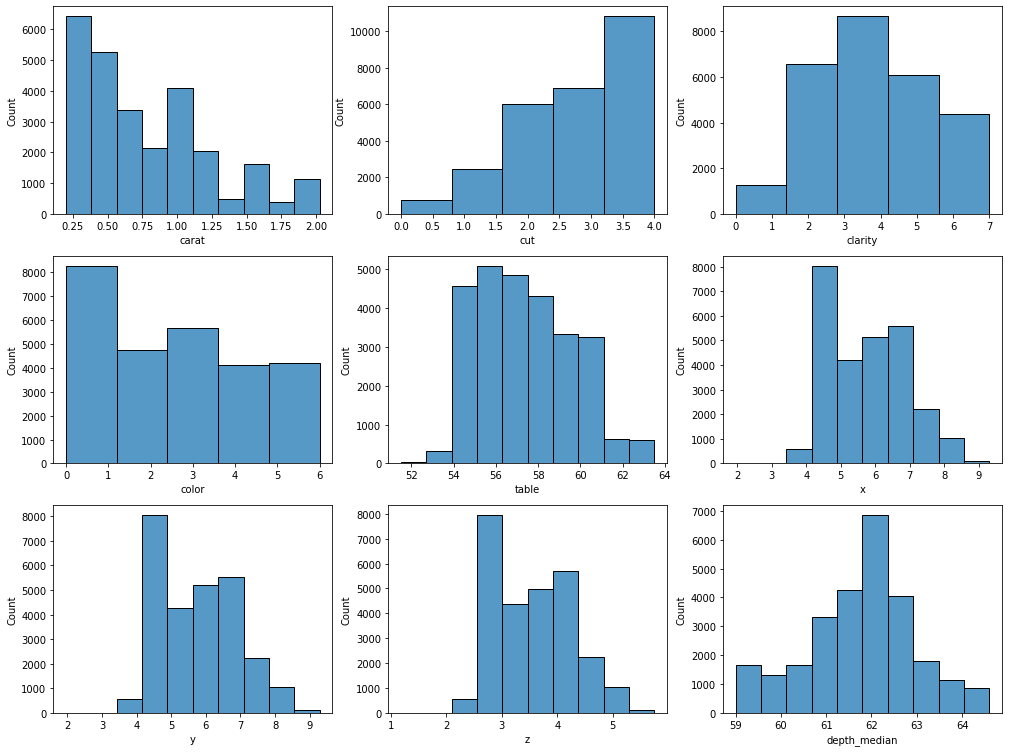

In [170]:
fig, ax = plt.subplots(3,3,figsize=(17,13))

sns.histplot(df.carat,ax=ax[0,0],bins=10)

sns.histplot(df.cut,ax=ax[0,1],bins=5)

sns.histplot(df.clarity,ax=ax[0,2],bins=5)

sns.histplot(df.color,ax=ax[1,0],bins=5)

sns.histplot(df.table,ax=ax[1,1],bins=10)

sns.histplot(df.x,ax=ax[1,2],bins=10)

sns.histplot(df.y,ax=ax[2,0],bins=10)

sns.histplot(df.z,ax=ax[2,1],bins=10)

sns.histplot(df.depth_median,ax=ax[2,2],bins=10)

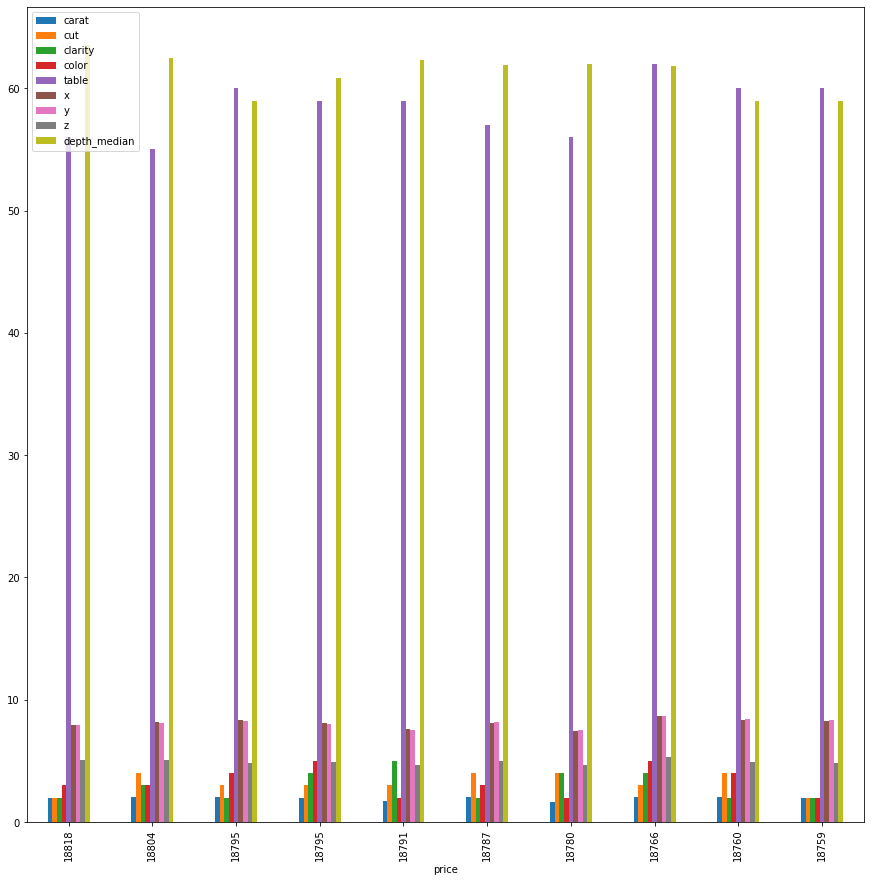

In [148]:
df.sort_values(by='price',ascending=False).head(10).plot(x = 'price',y=['carat','cut','clarity','color','table','x','y','z','depth_median'],kind='bar', figsize= (15, 15))

In [178]:
from sklearn.model_selection import  GridSearchCV
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score

In [176]:
x = df.drop(columns='price',axis=1)
y = df.iloc[:,-2]

In [179]:
train_x,test_x,train_y,test_y = tts(x,y,test_size=0.3,random_state=2)

In [184]:
param_grid = [{'n_estimators':[100,150,200],'max_depth':[5,7],'reg_lambda':[0.9,1.1],'learning_rate':[0.025,0.1], 'gamma':[0.9,1.1],'reg_alpha':[0.9,1.1]}]
XGB_REG = XGBRegressor(random_state=1,objective='reg:squarederror')

XGBR = GridSearchCV(XGB_REG, param_grid, cv=5, verbose=5,
                           scoring='neg_mean_squared_error',n_jobs=-1)
XGBR.fit(train_x,train_y)
XGB_REG=XGBR.best_estimator_

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 12.3min finished


In [185]:
y_pred = XGB_REG.predict(test_x)
y_pred = np.array(y_pred)
test_y = np.array(test_y)

In [186]:
r2_score(y_pred,test_y)

0.980260700498224

In [187]:
train_x

,carat,cut,color,clarity,table,x,y,z,depth_median
572,0.39,3,0,5,59.0,4.76,4.74,2.86,61.8
12742,1.66,4,1,3,56.0,7.45,7.63,4.73,62.7
787,0.33,3,3,1,58.0,4.46,4.42,2.70,60.8
16259,0.30,4,1,6,54.0,4.32,4.29,2.69,62.5
4247,0.61,4,2,7,55.0,5.43,5.47,3.37,61.8
...,...,...,...,...,...,...,...,...,...
18898,1.01,2,1,5,57.0,6.38,6.35,4.02,63.2
11798,0.50,4,4,2,54.0,5.12,5.16,3.15,61.3
6637,1.21,2,6,5,58.0,6.86,6.91,4.19,60.9
2575,1.05,4,3,5,56.0,6.54,6.52,4.03,61.7


In [205]:
data = pd.DataFrame({'carat':0.39,'cut':3,'color':0,'clarity':5,'table':59.0,'x':4.76,'y':4.74,'z':2.86,'depth_median':61.8},index=[0])

In [206]:
data

,carat,cut,color,clarity,table,x,y,z,depth_median
0,0.39,3,0,5,59.0,4.76,4.74,2.86,61.8


In [207]:
XGB_REG.predict(data)

array([1028.3433], dtype=float32)

In [208]:
test_dict = {'carat':0.29,'cut':2,'color':1,'clarity':3,'table':57.0,'x':4.66,'y':4.64,'z':2.82,'depth_median':62.8}

In [209]:
test = pd.DataFrame(test_dict,index=[0])
test

,carat,cut,color,clarity,table,x,y,z,depth_median
0,0.29,2,1,3,57.0,4.66,4.64,2.82,62.8


In [210]:
XGB_REG.predict(test)

array([597.659], dtype=float32)

In [217]:
carat,cut,color,clarity,table,x,y,z,depth_median=0.4,2,1,3,57.0,4.66,4.64,2.82,62.8
test = pd.DataFrame({'carat':carat,'cut':cut,'color':color,'clarity':clarity,'table':table,'x':x,'y':y,'z':z,'depth_median':depth_median},index=[0])
test

,carat,cut,color,clarity,table,x,y,z,depth_median
0,0.4,2,1,3,57.0,4.66,4.64,2.82,62.8


In [218]:
XGB_REG.predict(test)

array([627.62213], dtype=float32)